Найкраще значення K для нових даних: 27
Похибка на тестовій вибірці для K = 27: 0.0820


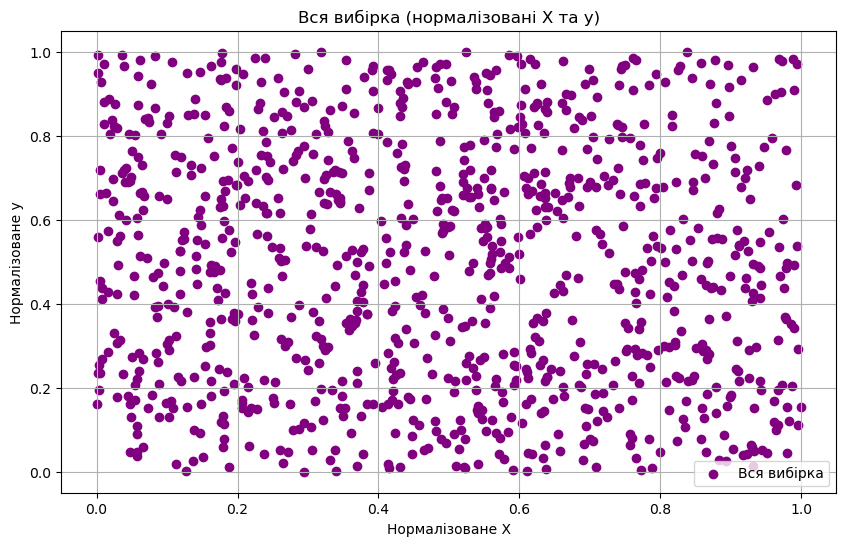

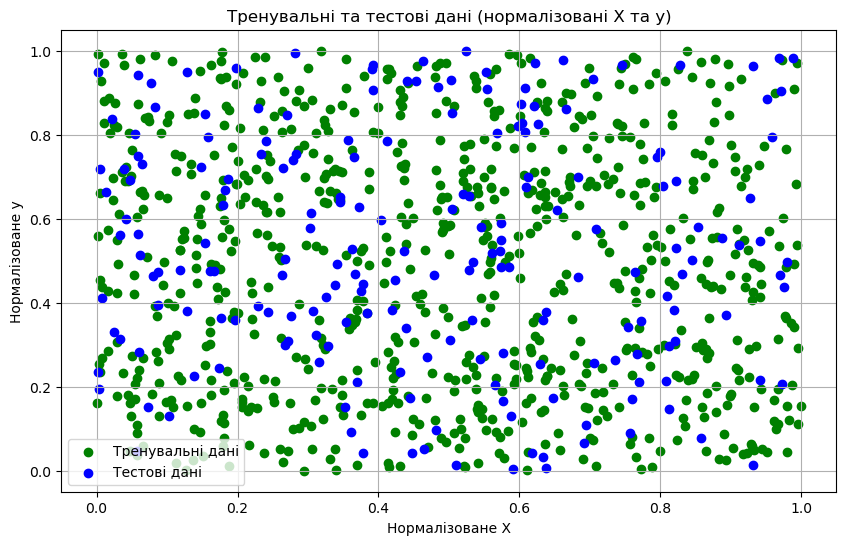

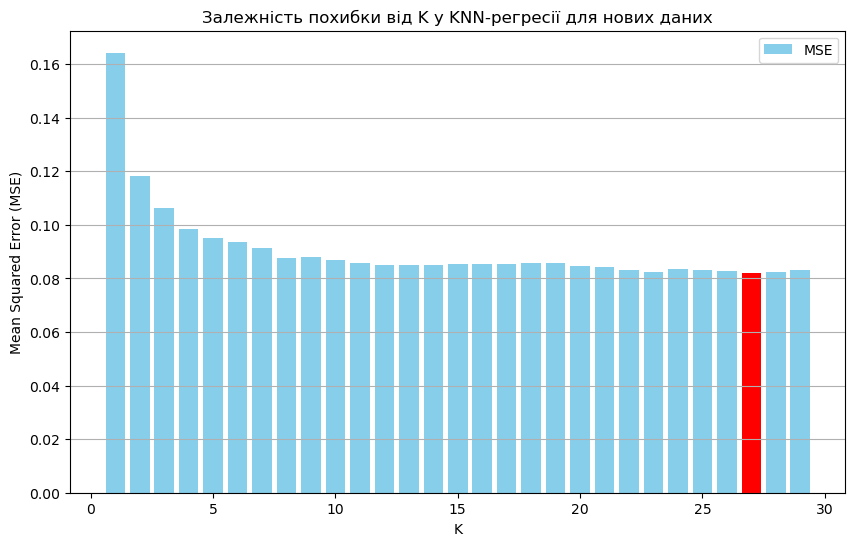

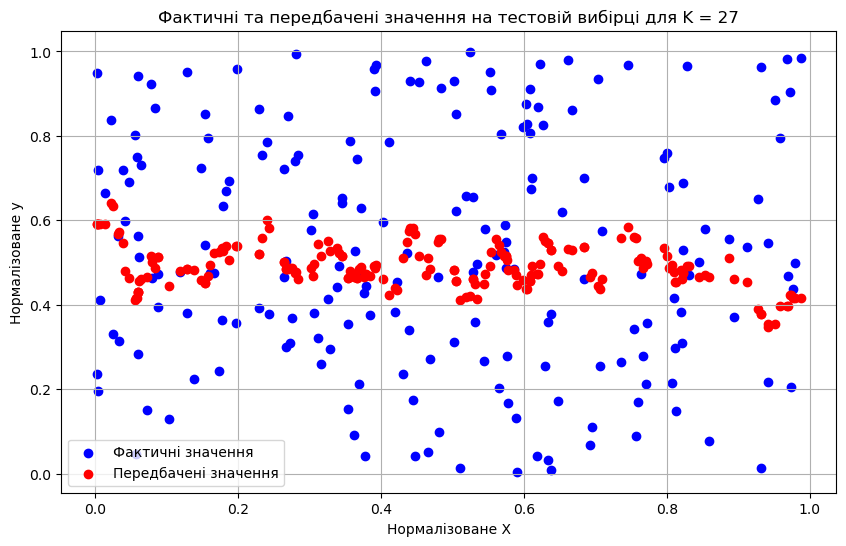

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


X_new = np.array([random.random() for _ in range(1000)])
y_new = np.array([random.random() for _ in range(1000)]) 

# 2. Нормалізація значень для X і y
X_min_new, X_max_new = min(X_new), max(X_new)
X_norm_new = (X_new - X_min_new) / (X_max_new - X_min_new)  # Мінімакс нормалізація для X

# Нормалізація y
y_min_new, y_max_new = min(y_new), max(y_new)
y_norm_new = (y_new - y_min_new) / (y_max_new - y_min_new)

# 3. Розділ на навчальну і тестову вибірки
train_size_new = int(0.8 * len(X_norm_new))
X_train_new, X_test_new = X_norm_new[:train_size_new], X_norm_new[train_size_new:]
y_train_new, y_test_new = y_norm_new[:train_size_new], y_norm_new[train_size_new:]

# 4. Реалізація KNN-регресора
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = np.abs(X_train - x)
        neighbors_idx = np.argsort(distances)[:k]
        neighbors_values = y_train[neighbors_idx]
        y_pred.append(np.mean(neighbors_values))
    return np.array(y_pred)

# 5. Пошук найкращого K та обчислення помилок
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

k_values = range(1, 30)
errors_new = []

for k in k_values:
    y_pred_new = knn_predict(X_train_new, y_train_new, X_test_new, k)
    mse_new = mean_squared_error(y_test_new, y_pred_new)
    errors_new.append(mse_new)

# Вибір найкращого значення K
best_k_new = k_values[np.argmin(errors_new)]
print(f'Найкраще значення K для нових даних: {best_k_new}')

# Тестування на тестовій вибірці з найкращим K
y_test_pred_new = knn_predict(X_train_new, y_train_new, X_test_new, best_k_new)
test_mse_new = mean_squared_error(y_test_new, y_test_pred_new)
print(f'Похибка на тестовій вибірці для K = {best_k_new}: {test_mse_new:.4f}')

# 6. Графік всієї вибірки
plt.figure(figsize=(10, 6))
plt.scatter(X_norm_new, y_norm_new, color='purple', label='Вся вибірка')
plt.title('Вся вибірка (нормалізовані X та y)')
plt.xlabel('Нормалізоване X')
plt.ylabel('Нормалізоване y')
plt.legend()
plt.grid(True)
plt.show()

# 7. Графік розподілу тренувальних та тестових даних
plt.figure(figsize=(10, 6))

# Навчальні дані
plt.scatter(X_train_new, y_train_new, color='green', label='Тренувальні дані')

# Тестові дані
plt.scatter(X_test_new, y_test_new, color='blue', label='Тестові дані')

plt.title('Тренувальні та тестові дані (нормалізовані X та y)')
plt.xlabel('Нормалізоване X')
plt.ylabel('Нормалізоване y')
plt.legend()
plt.grid(True)
plt.show()

# 6. Візуалізація залежності похибки від K для нових даних (стовпчаста діаграма)
colors = ['red' if i == np.argmin(errors_new) else 'skyblue' for i in range(len(k_values))]

plt.figure(figsize=(10, 6))
bars = plt.bar(k_values, errors_new, color=colors, label='MSE')


plt.title('Залежність похибки від K у KNN-регресії для нових даних')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True, axis='y')  # Додаємо сітку тільки по осі Y
plt.show()


# 8. Візуалізація реальних та передбачених значень на тестовій вибірці для нових даних
plt.figure(figsize=(10, 6))
plt.scatter(X_test_new, y_test_new, color='blue', label='Фактичні значення')
plt.scatter(X_test_new, y_test_pred_new, color='red', label='Передбачені значення')
plt.title(f'Фактичні та передбачені значення на тестовій вибірці для K = {best_k_new}')
plt.xlabel('Нормалізоване X')
plt.ylabel('Нормалізоване y')
plt.legend()
plt.grid(True)
plt.show()
